## Data transformation

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
plt.style.use('seaborn-white')

In [28]:
df = pd.read_csv('customer_supermarket_prepared.csv', sep=',')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(30)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,TotSale
0,536365,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30
1,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6,20.34
2,536365,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00
3,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34
4,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34
5,536365,2010-12-01 08:26:00,7.65,17850,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2,15.30
6,536365,2010-12-01 08:26:00,4.25,17850,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,25.50
7,536366,2010-12-01 08:28:00,1.85,17850,United Kingdom,22633,HAND WARMER UNION JACK,6,11.10
8,536366,2010-12-01 08:28:00,1.85,17850,United Kingdom,22632,HAND WARMER RED POLKA DOT,6,11.10
9,536368,2010-12-01 08:34:00,4.25,13047,United Kingdom,22960,JAM MAKING SET WITH JARS,6,25.50


In [29]:
df['BasketDate'] = pd.to_datetime(df['BasketDate'], format="%Y-%m-%d %H:%M:%S")

### Calcolo gli attributi I e Iu

In [30]:
df1 = df.groupby('CustomerID').aggregate({'Qta':'sum', 'ProdID':'nunique'})
df1.rename(columns={'Qta':'I', 'ProdID':'Iu'}, inplace=True)

### Cacolo l'attributo Imax

In [31]:
df_agg = df.groupby(['CustomerID', 'BasketID']).aggregate({'Qta':'sum'}).reset_index(level='CustomerID')

df2 = df_agg.groupby('CustomerID').aggregate({'Qta':'max'})
df2.rename(columns={'Qta':'Imax'}, inplace=True)

In [32]:
df_customer = pd.merge(df1, df2, on='CustomerID')
df_customer

,I,Iu,Imax
CustomerID,,,
12346,74215,1,74215
12347,2458,103,676
12348,2332,21,1248
12349,630,72,630
12350,196,16,196
...,...,...,...
18280,45,10,45
18281,54,7,54
18282,103,12,75


I: the total number of items purchased by a customer during the period of observation.

Iu: the number of distinct items bought by a customer in the period of observation.

Imax: the maximum number of items purchased by a customer during a shopping session.

### Indicatori aggiuntivi

Per ogni utente calcolo:
- Il numero totale di basket 
- Recency: la recency indica il numero di giorni che l'utente è stato inattivo, con riferimento alla data più recente contenuta nel dataset (2011-12-09)
- Frequency: il numero tatale di ordini fatti dall'utente, durante l'intero periodo di osservazione
- MonetaryValue: quanto  l'utente ha speso in totale, durante l'intero periodo di osservazione

In [33]:
df_n_basket_per_user = df.groupby('CustomerID').aggregate({'BasketID':'nunique'})
df_n_basket_per_user.rename(columns={'BasketID':'NumBasket'}, inplace=True)
df_customer['NumBasket'] = df_n_basket_per_user['NumBasket']
df_customer

,I,Iu,Imax,NumBasket
CustomerID,,,,
12346,74215,1,74215,1
12347,2458,103,676,7
12348,2332,21,1248,4
12349,630,72,630,1
12350,196,16,196,1
...,...,...,...,...
18280,45,10,45,1
18281,54,7,54,1
18282,103,12,75,2


In [34]:
#Recency
df_max_date = df.groupby('CustomerID').aggregate({'BasketDate':'max'})
recency = (df['BasketDate'].max() - df_max_date['BasketDate']).dt.days
df_customer['Recency'] = recency

#Frequency
df_frequency = df.groupby('CustomerID').aggregate({'BasketID':'count'})
frequency = df_frequency['BasketID']
df_customer['Frequency'] = frequency

#MonetaryValue
df_customer['MonetaryValue'] = df.groupby('CustomerID').aggregate({'TotSale':'sum'})['TotSale']

df_customer

,I,Iu,Imax,NumBasket,Recency,Frequency,MonetaryValue
CustomerID,,,,,,,
12346,74215,1,74215,1,325,1,77183.60
12347,2458,103,676,7,1,182,4310.00
12348,2332,21,1248,4,74,27,1437.24
12349,630,72,630,1,18,72,1457.55
12350,196,16,196,1,309,16,294.40
...,...,...,...,...,...,...,...
18280,45,10,45,1,277,10,180.60
18281,54,7,54,1,180,7,80.82
18282,103,12,75,2,7,12,178.05


In [35]:
def calculate_entropy(series):
    return entropy(series.value_counts())
    
# Shannon Entropy rispetto alla spesa per ogni ordine effettuato. 
df_tot_sale_entropy = df.groupby('CustomerID').aggregate({'TotSale': calculate_entropy})

# Shannon Entropy rispetto al giorno della settimana in cui l'utente fa acquisti
df_days_entropy = df.groupby('CustomerID').aggregate({'BasketDate': lambda s: calculate_entropy(s.dt.dayofweek)})

# Shannon Entropy rispetto ai prodotti acquistati
df_products_entropy = df.groupby('CustomerID').aggregate({'ProdID': calculate_entropy})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6249F3490>],
      dtype=object)

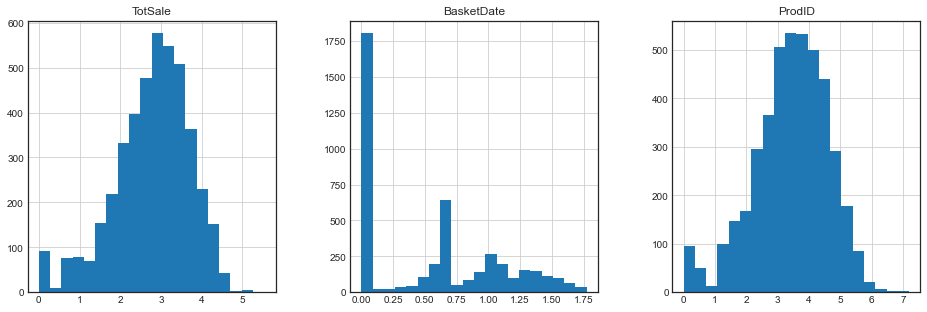

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(16)
df_tot_sale_entropy.hist(ax=axes[0], bins = 20)
df_days_entropy.hist(ax=axes[1], bins = 20)
df_products_entropy.hist(ax=axes[2], bins = 20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E622F1CCD0>]],
      dtype=object)

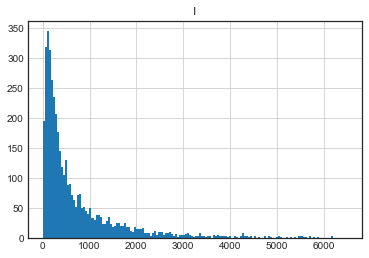

In [37]:
df_customer.hist(column='I', bins=150, range=[0, 6500])

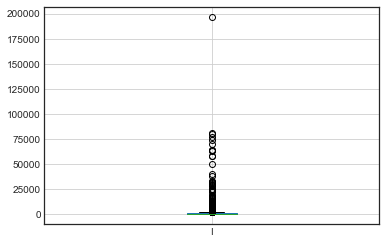

In [38]:
df_customer.boxplot(column='I')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6243553D0>]],
      dtype=object)

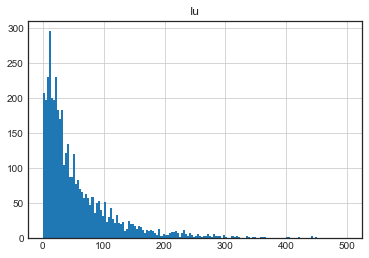

In [39]:
df_customer.hist(column='Iu', bins=150, range=[0, 500])

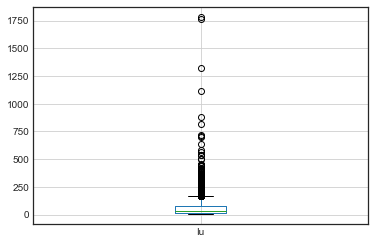

In [40]:
df_customer.boxplot(column='Iu')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6285E8C70>]],
      dtype=object)

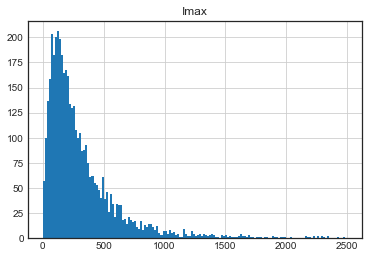

In [41]:
df_customer.hist(column='Imax', bins=150, range=[0, 2500])

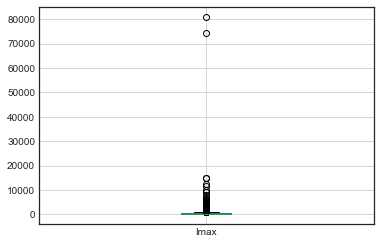

In [42]:
df_customer.boxplot(column='Imax')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E628B61D00>]],
      dtype=object)

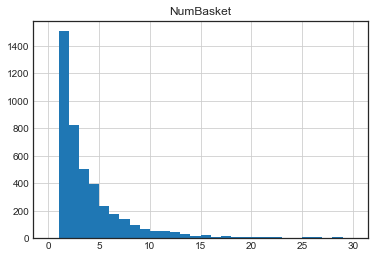

In [43]:
df_customer.hist(column='NumBasket', bins=30, range=[0,30])

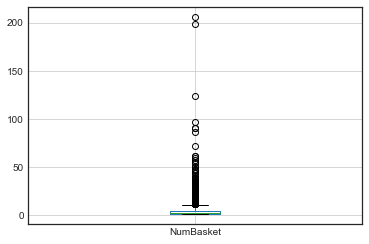

In [44]:
df_customer.boxplot(column='NumBasket')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E628B92850>]],
      dtype=object)

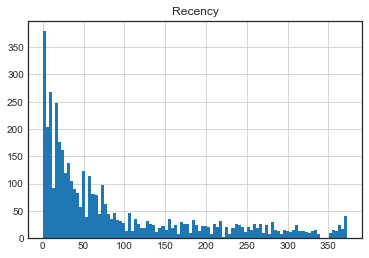

In [45]:
df_customer.hist(column='Recency', bins=100)

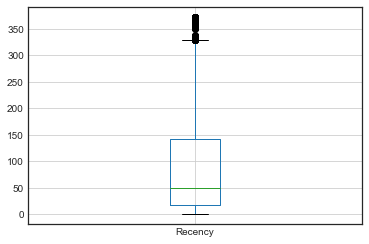

In [46]:
df_customer.boxplot(column='Recency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E628E08B50>]],
      dtype=object)

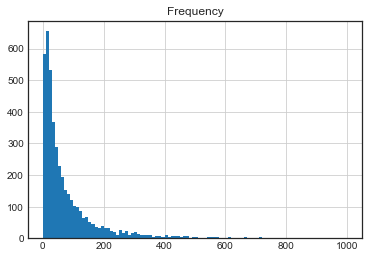

In [47]:
df_customer.hist(column='Frequency', bins=100, range=[0,1000])

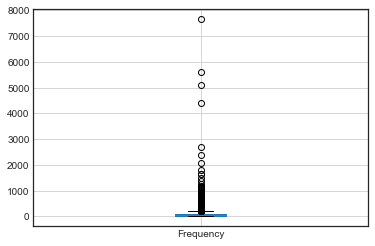

In [48]:
df_customer.boxplot(column='Frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E622F28820>]],
      dtype=object)

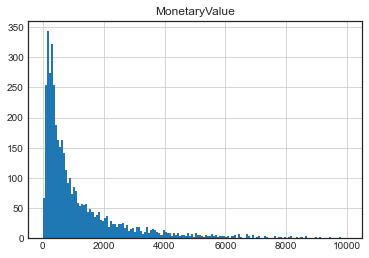

In [49]:
df_customer.hist(column='MonetaryValue', bins=150, range=[0, 10000])

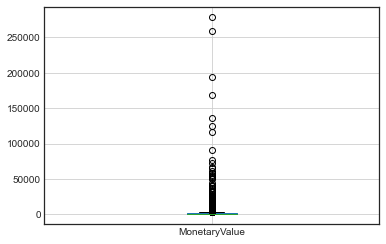

In [50]:
df_customer.boxplot(column='MonetaryValue')

In [51]:
df_customer['EntropyOrderSale'] = df_tot_sale_entropy['TotSale']
df_customer['EntropyDay'] = df_days_entropy['BasketDate']
df_customer['EntropyProducts'] = df_products_entropy['ProdID']

In [52]:
df_customer.corr()

,I,Iu,Imax,NumBasket,Recency,Frequency,MonetaryValue,EntropyOrderSale,EntropyDay,EntropyProducts
I,1.000000,0.408777,0.579691,0.555575,-0.122922,0.432160,0.923445,0.204446,0.240566,0.179926
Iu,0.408777,1.000000,0.108235,0.691681,-0.300605,0.876765,0.378293,0.605048,0.448552,0.690989
Imax,0.579691,0.108235,1.000000,0.128063,-0.040044,0.096216,0.528033,0.046316,0.075713,0.036829
NumBasket,0.555575,0.691681,0.128063,1.000000,-0.261171,0.756280,0.547377,0.373882,0.513345,0.364771
Recency,-0.122922,-0.300605,-0.040044,-0.261171,1.000000,-0.206426,-0.120902,-0.418951,-0.477269,-0.403565
Frequency,0.432160,0.876765,0.096216,0.756280,-0.206426,1.000000,0.414300,0.390633,0.342492,0.449332
MonetaryValue,0.923445,0.378293,0.528033,0.547377,-0.120902,0.414300,1.000000,0.207783,0.235292,0.173319
EntropyOrderSale,0.204446,0.605048,0.046316,0.373882,-0.418951,0.390633,0.207783,1.000000,0.526438,0.928595
EntropyDay,0.240566,0.448552,0.075713,0.513345,-0.477269,0.342492,0.235292,0.526438,1.000000,0.514651
EntropyProducts,0.179926,0.690989,0.036829,0.364771,-0.403565,0.449332,0.173319,0.928595,0.514651,1.000000


In [54]:
df_customer_reduced = df_customer.drop(columns=['I','Iu', 'NumBasket', 'EntropyOrderSale', 'EntropyDay'])
df_customer_reduced

,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
CustomerID,,,,,
12346,74215,325,1,77183.60,0.000000
12347,676,1,182,4310.00,4.464578
12348,1248,74,27,1437.24,2.987771
12349,630,18,72,1457.55,4.276666
12350,196,309,16,294.40,2.772589
...,...,...,...,...,...
18280,45,277,10,180.60,2.302585
18281,54,180,7,80.82,1.945910
18282,75,7,12,178.05,2.484907


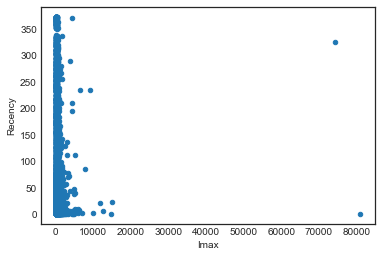

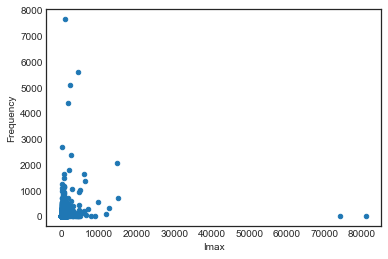

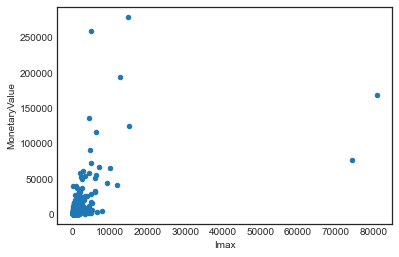

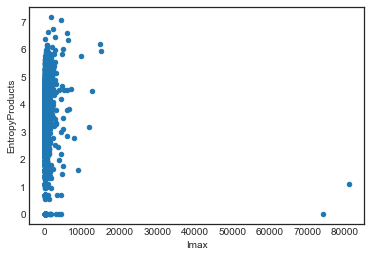

In [61]:
df_customer_reduced.plot.scatter(x='Imax', y='Recency')
df_customer_reduced.plot.scatter(x='Imax', y='Frequency')
df_customer_reduced.plot.scatter(x='Imax', y='MonetaryValue')
df_customer_reduced.plot.scatter(x='Imax', y='EntropyProducts')

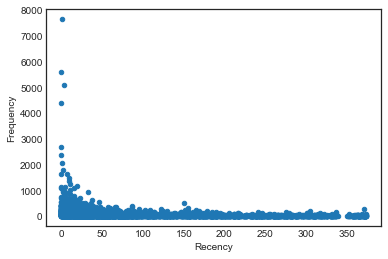

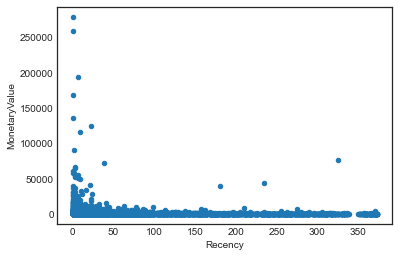

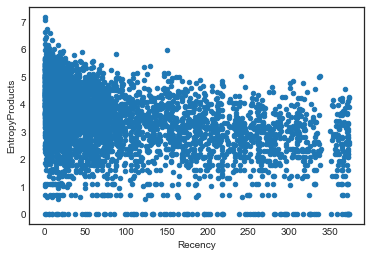

In [63]:
df_customer_reduced.plot.scatter(x='Recency', y='Frequency')
df_customer_reduced.plot.scatter(x='Recency', y='MonetaryValue')
df_customer_reduced.plot.scatter(x='Recency', y='EntropyProducts')


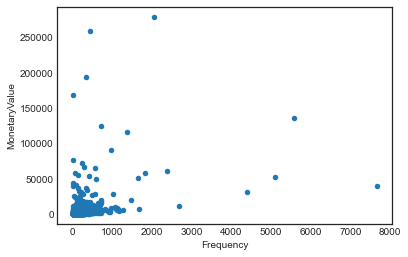

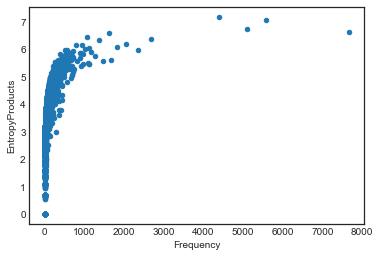

In [64]:
df_customer_reduced.plot.scatter(x='Frequency', y='MonetaryValue')
df_customer_reduced.plot.scatter(x='Frequency', y='EntropyProducts')

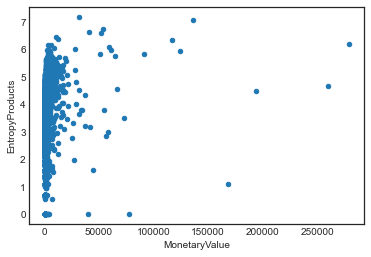

In [65]:
df_customer_reduced.plot.scatter(x='MonetaryValue', y='EntropyProducts')